# 0.- Installing libraries

In [1]:
%pip install pandas
%pip install seaborn
%pip install matplotlib
%pip install numpy

Note: you may need to restart the kernel to use updated packages.
  Using cached seaborn-0.13.0-py3-none-any.whl.metadata (5.3 kB)
  Using cached contourpy-1.1.1-cp38-cp38-macosx_10_9_x86_64.whl.metadata (5.9 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.2/155.2 kB 1.9 MB/s eta 0:00:0000:0100:01
  Using cached kiwisolver-1.4.5-cp38-cp38-macosx_10_9_x86_64.whl.metadata (6.4 kB)
  Using cached Pillow-10.1.0-cp38-cp38-macosx_10_10_x86_64.whl.metadata (9.5 kB)
  Using cached pyparsing-3.1.1-py3-none-any.whl.metadata (5.1 kB)
  Using cached importlib_resources-6.1.1-py3-none-any.whl.metadata (4.1 kB)
Using cached seaborn-0.13.0-py3-none-any.whl (294 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 29.1 MB/s eta 0:00:0000:0100:01
Using cached contourpy-1.1.1-cp38-cp38-macosx_10_9_x86_64.whl (247 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 26.9 M

# 1.- Loading libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import io as io

# 2.- Loading data

As input information I have two CSV files:

- train.csv - training part of the dataset, contains labels and information about passengers.
- test.csv - testing part of the dataset, doesn't contain labels.

In this notebook I will use all available information (train + test datasets) to perform exploratory data analysis.

1- First, load both csv files into two DataFrames, using pandas read_csv method and check the shape of the loaded data:

In [3]:
# Read a comma-separated values (csv) file into pandas DataFrame
train_data = pd.read_csv('titanic_train.csv')
test_data = pd.read_csv('titanic_test.csv')

# shape of tha data
print('Train shape: ', train_data.shape)
print('Test shape: ', test_data.shape)

Train shape:  (891, 12)
Test shape:  (418, 11)


In [4]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


The training part contains information about 891 passengers, described by 12 variables, including 1 target variable. The testing part contains 418 observations, i.e information about passengers, described by 11 variables (the test dataset doesn't contain target value.)

Combine test and train data into one "all_data" DataFrame. To do so, I create a sequence of DataFrame objects and use pandas concat method. Terget values of testing data in resulting dataset will be NaN. Check the shape of the result DataFrame and take a look at the first 4 rows:

In [5]:
# create a sequence of DataFrame objects
frames = [train_data, test_data]
# Concatenate pandas objects along a particular axis 
all_data = pd.concat(frames, sort = False)
# shape of the data
print('All data shape: ', all_data.shape)
# Show first 4 rows of the concatenated DataFrame
all_data.head(5)

All data shape:  (1309, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
all_data.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


Overall, we have information about 1309 passengers. I am guessing, this dataset contains data only about passengers, not crew members (we know, that Titanic carried 2224 people).

# 3.- First look: variables, NAs
It is necessary to identify all variables, ranges, data types, etc. This can be obtained from the dataset description.


## Variables
* PassengerId: unique identifier
* Survived: 0 = no, 1 = yes
* Pclass: Ticket class - 1 = 1st, Upper; 2 = 2nd - Middle, 3 = 3rd - Lower
* Name: full name with a title
* Sex: gender
* Age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
* Sibsp: Number of siblings / spouses aboard the Titanic. The dataset defines family relations in this way: **Sibling** = brother, sister, stepbrother, stepsister; **Spouse** = husband, wife (mistresses and fiancés were ignored).
* Parch: Number of parents / children aboard the Titanic. The dataset defines family relations in this way: **Parent** = mother, father; **Child** = daughter, son, stepdaughter, stepson (some children travelled only with a nanny, therefore **parch=0** for them).
* Ticket: Ticket number.
* Fare: Passenger fare.
* Cabin: Cabin number.
* Embarked: Port of Embarkation - **C** = Cherbourg; **Q** = Queenstown, **S** = Southampton

## Types of the variables

In [7]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


- Age and Fare are continuous numeric variables.
- Pclass is integer, but in fact it is categorical variable, represented by 3 numbers.
- After previous manipulations, Survived variable has type 'float', it's not correct, since it's categorical variable too, but it will not influence my EDA process, so I will let it be float for now.

## Obtaining some stats from data

In [8]:
all_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


## Check data for NA

To check the dataset for NAs I am using isna() dataframe function, which returns a boolean same-sized object indicating if the values are NA and then I am calculating the number of True values for each variable. NA values for each dataframe (train, test, all) presented in the table below:

In [9]:
# check data for NA values
all_data_NA = all_data.isna().sum()
train_NA = train_data.isna().sum()
test_NA = test_data.isna().sum()

pd.concat([train_NA, test_NA, all_data_NA], axis=1, sort = False, keys = ['Train NA', 'Test NA', 'All NA'])

,Train NA,Test NA,All NA
PassengerId,0,0.0,0
Survived,0,NaN,418
Pclass,0,0.0,0
Name,0,0.0,0
Sex,0,0.0,0
Age,177,86.0,263
SibSp,0,0.0,0
Parch,0,0.0,0
Ticket,0,0.0,0
Fare,0,1.0,1


There are overall 263 missing Age values, 1 missing Fare, 1014 NAs in Cabin variable, and 2 in Embarked variable.
418 NA in Survived variable due to the absence of this information in the test dataset. I will not impute these missings in the current notebook :) So, when I will use this variable for visualization, there will be information only for the training part of the data.

In this notebook I will do some missing data handling for the combined dataset. But in the second part of my work (ML solution) this should be done based on what we know only about training data, to avoid any data leakage.

# 4.- Exploring the data

## Survivals - target value

Let's calculate and visualise distribution of our target variable - 'Survived' A countplot of seaborn module is a very useful way to show the counts of observations in each category. Since we have target only for the training part, these numbers don't include all passengers.

/var/folders/72/611d5rq92794d5dzdh80xgn40000gp/T/ipykernel_80796/1054891241.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = 'Survived', data = all_data, palette=["#3f3e6fd1", "#85c6a9"])


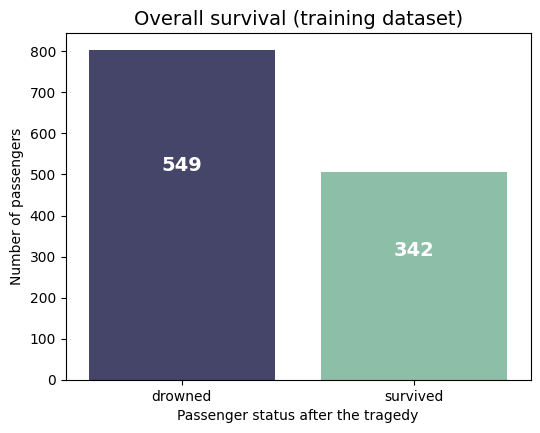

In [10]:
# set size of the plot
plt.figure(figsize=(6, 4.5)) 

# countplot shows the counts of observations in each categorical bin using bars.
# x - name of the categorical variable
ax = sns.countplot(x = 'Survived', data = all_data, palette=["#3f3e6fd1", "#85c6a9"])

# set the current tick locations and labels of the x-axis.
plt.xticks( np.arange(2), ['drowned', 'survived'] )
# set title
plt.title('Overall survival (training dataset)',fontsize= 14)
# set x label
plt.xlabel('Passenger status after the tragedy')
# set y label
plt.ylabel('Number of passengers')

# calculate passengers for each category
labels = (all_data['Survived'].value_counts())
# add result numbers on barchart
for i, v in enumerate(labels):
    ax.text(i, v-40, str(v), horizontalalignment = 'center', size = 14, color = 'w', fontweight = 'bold')
    
plt.show()

In [11]:
all_data['Survived'].value_counts(normalize = True)

Survived
0.0    0.616162
1.0    0.383838
Name: proportion, dtype: float64

We have 891 passengers in train dataset, 549 (61,6%) of them drowned and only 342 (38,4%) survived. But we know, that lifeboats could carry 53% of total passengers.

## Age

What is the age of passengers, how it relates to the chances of survival, and how it changes depending on class and gender.

### Age distribution

We have 263 missing values:

- 177 missing in the training dataset
- 86 in the test dataset

Overall age distribution (seaborn distplot) and descriptive statistics:

/var/folders/72/611d5rq92794d5dzdh80xgn40000gp/T/ipykernel_80796/237857426.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(all_data[(all_data["Age"] > 0)].Age, kde_kws={"lw": 3}, bins = 50)


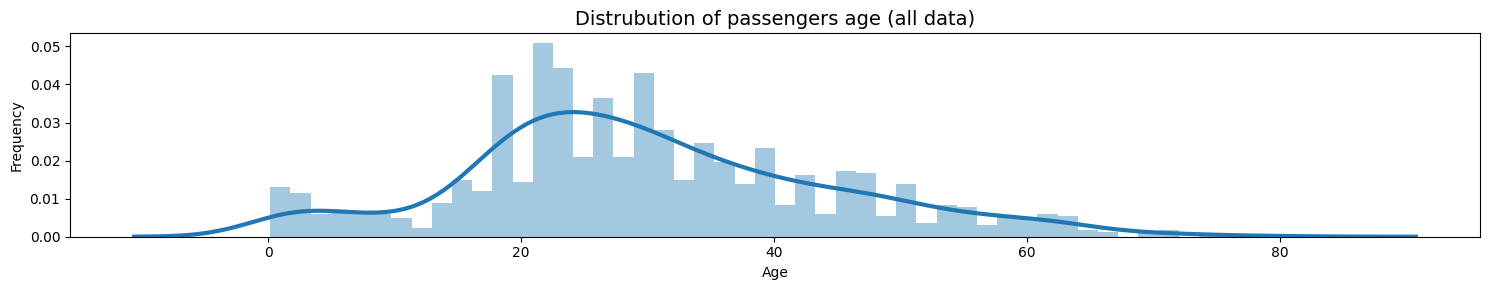

In [12]:
# set plot size
plt.figure(figsize=(15, 3))

# plot a univariate distribution of Age observations 
sns.distplot(all_data[(all_data["Age"] > 0)].Age, kde_kws={"lw": 3}, bins = 50)

# set titles and labels
plt.title('Distrubution of passengers age (all data)',fontsize= 14)
plt.xlabel('Age')
plt.ylabel('Frequency')
# clean layout
plt.tight_layout()

In [13]:
# Descriptive statistics include those that summarize the central tendency, 
# dispersion and shape of a dataset’s distribution, excluding NaN values.
age_distr = pd.DataFrame(all_data['Age'].describe())
# Transpose index and columns.
age_distr.transpose()

,count,mean,std,min,25%,50%,75%,max
Age,1046.0,29.881138,14.413493,0.17,21.0,28.0,39.0,80.0


The distribution of Age is slightly right skewed. The Age vary from about 0.17 year to 80 years with mean = 29.88, and there don't seem to be any obvious outliers, but we will check it.

### Age by surviving status

Did age had a big influence on chances to survive? To visualize two age distributions, grouped by surviving status I am using boxlot and stripplot showed together:

/var/folders/72/611d5rq92794d5dzdh80xgn40000gp/T/ipykernel_80796/3623421144.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y = 'Survived', x = 'Age', data = train_data,
/var/folders/72/611d5rq92794d5dzdh80xgn40000gp/T/ipykernel_80796/3623421144.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(y = 'Survived', x = 'Age', data = train_data,


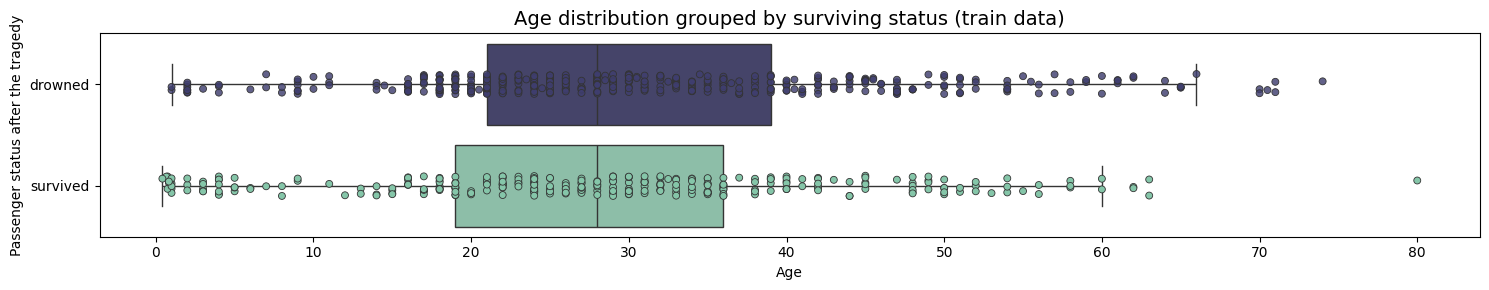

In [14]:
plt.figure(figsize=(15, 3))

# Draw a box plot to show Age distributions with respect to survival status.
sns.boxplot(y = 'Survived', x = 'Age', data = train_data,
     palette=["#3f3e6fd1", "#85c6a9"], fliersize = 0, orient = 'h')

# Add a scatterplot for each category.
sns.stripplot(y = 'Survived', x = 'Age', data = train_data,
     linewidth = 0.6, palette=["#3f3e6fd1", "#85c6a9"], orient = 'h')

plt.yticks( np.arange(2), ['drowned', 'survived'])
plt.title('Age distribution grouped by surviving status (train data)',fontsize= 14)
plt.ylabel('Passenger status after the tragedy')
plt.tight_layout()

In [15]:
# Descriptive statistics:
pd.DataFrame(all_data.groupby('Survived')['Age'].describe())

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0.0,424.0,30.626179,14.172110,1.00,21.0,28.0,39.0,74.0
1.0,290.0,28.343690,14.950952,0.42,19.0,28.0,36.0,80.0


The mean age of survived passenger is 28.34 which on 2.28 smaller than the mean age of drowned passengers (only passengers we know survived status for). The minimum age of drowned passengers is 1 y.o which is very sad. The maximum age of survived passenger is 80 y.o, let's check if there is no mistake.

In [16]:
all_data[all_data['Age'] == max(all_data['Age'] )]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1.0,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0,A23,S


Actually, Mr Algernon Henry Barkworth was born on 4 June 1864.He was 48 in 1912 and died in 1945 at 80 y.o.

In [17]:
train_data.loc[train_data['PassengerId'] == 631, 'Age'] = 48
all_data.loc[all_data['PassengerId'] == 631, 'Age'] = 48

In [18]:
# Descriptive statistics:
pd.DataFrame(all_data.groupby('Survived')['Age'].describe())

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0.0,424.0,30.626179,14.172110,1.00,21.0,28.0,39.0,74.0
1.0,290.0,28.233345,14.684091,0.42,19.0,28.0,36.0,63.0


Let's update our description:
The mean age of survived passenger is 28.23 which on 2.39 smaller than the mean age of drowned passengers (only passengers we know survived status for).= The maximum age of survived passenger is 63 y.o. It looks like there is a slightly bigger chance to survive for younger people.

### Age by class

There I will compare three age distributions, grouped by class of the passenger.
As visualisations I will use 2 gaphs:

1- boxplot + stripplot as before
2- kdeplot, to plot age density curves for each class. This method can't handle missing values, so I filter the data before using it.

/var/folders/72/611d5rq92794d5dzdh80xgn40000gp/T/ipykernel_80796/4078691307.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'Pclass', y = 'Age', data = all_data,
/var/folders/72/611d5rq92794d5dzdh80xgn40000gp/T/ipykernel_80796/4078691307.py:8: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.boxplot(x = 'Pclass', y = 'Age', data = all_data,


ValueError: cannot reindex on an axis with duplicate labels

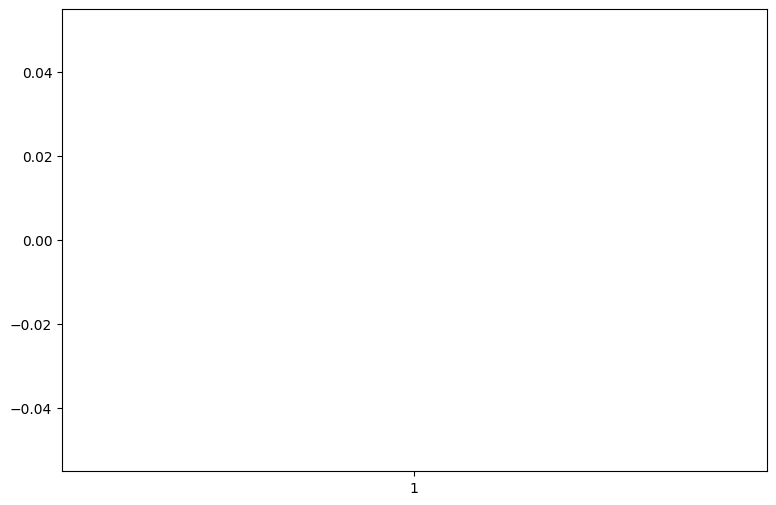

In [22]:
# set size
plt.figure(figsize=(20, 6))

# set palette
palette = sns.cubehelix_palette(5, start = 3)

plt.subplot(1, 2, 1)
sns.boxplot(x = 'Pclass', y = 'Age', data = all_data,
     palette = palette, fliersize = 0)

sns.stripplot(x = 'Pclass', y = 'Age', data = all_data,
     linewidth = 0.6, palette = palette)
plt.xticks( np.arange(3), ['1st class', '2nd class', '3rd class'])
plt.title('Age distribution grouped by ticket class (all data)',fontsize= 16)
plt.xlabel('Ticket class')


plt.subplot(1, 2, 2)

# To use kdeplot I need to create variables with filtered data for each category
age_1_class = all_data[(all_data["Age"] > 0) & 
                              (all_data["Pclass"] == 1)]
age_2_class = all_data[(all_data["Age"] > 0) & 
                              (all_data["Pclass"] == 2)]
age_3_class = all_data[(all_data["Age"] > 0) & 
                              (all_data["Pclass"] == 3)]

# Ploting the 3 variables that we create
sns.kdeplot(age_1_class["Age"], shade=True, color='#eed4d0', label = '1st class')
sns.kdeplot(age_2_class["Age"], shade=True,  color='#cda0aa', label = '2nd class')
sns.kdeplot(age_3_class["Age"], shade=True,color='#a2708e', label = '3rd class')
plt.title('Age distribution grouped by ticket class (all data)',fontsize= 16)
plt.xlabel('Age')
plt.xlim(0, 90)
plt.tight_layout()
plt.show()

In [20]:
# Descriptive statistics:
pd.DataFrame(all_data.groupby('Pclass')['Age'].describe())

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,284.0,39.047254,14.353217,0.92,28.0,39.0,49.25,76.0
2,261.0,29.506705,13.638627,0.67,22.0,29.0,36.00,70.0
3,501.0,24.816367,11.958202,0.17,18.0,24.0,32.00,74.0


1st class has wider distribution compare to 2nd and 3rd and almost symmetric. Both 2nd and 3rd classes age distributions are right skewed. The youngest passenger has 3rd class ticket, age = 0.17. The oldest passenger has 1st class ticket, age = 76. 3rd class mean age = 24.8, 2nd classe average age is 29.5 and 1st class average age is 39.1.  

Since survived passengers on average were younger than drowned, does it mean, that 3rd class passengers had more chances to survive? We will discover it later.

From graphs we can see difference in age distribution between classes. So when I will do missing data imputation I will take class into account.

### Age vs class vs gender

Comparison of age distribution by gender I will do separately for each class since we have such a noticeable age difference between classes.

NameError: name 'age_1_class' is not defined

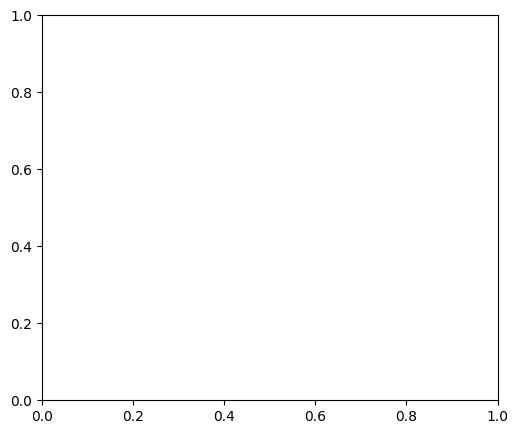

In [21]:
plt.figure(figsize=(20, 5))
palette = "Set3"

plt.subplot(1, 3, 1)
sns.boxplot(x = 'Sex', y = 'Age', data = age_1_class,
     palette = palette, fliersize = 0)
sns.stripplot(x = 'Sex', y = 'Age', data = age_1_class,
     linewidth = 0.6, palette = palette)
plt.title('1st class Age distribution by Sex',fontsize= 14)
plt.ylim(-5, 80)

plt.subplot(1, 3, 2)
sns.boxplot(x = 'Sex', y = 'Age', data = age_2_class,
     palette = palette, fliersize = 0)
sns.stripplot(x = 'Sex', y = 'Age', data = age_2_class,
     linewidth = 0.6, palette = palette)
plt.title('2nd class Age distribution by Sex',fontsize= 14)
plt.ylim(-5, 80)

plt.subplot(1, 3, 3)
sns.boxplot(x = 'Sex', y = 'Age',  data = age_3_class,
     order = ['female', 'male'], palette = palette, fliersize = 0)
sns.stripplot(x = 'Sex', y = 'Age', data = age_3_class,
     order = ['female', 'male'], linewidth = 0.6, palette = palette)
plt.title('3rd class Age distribution by Sex',fontsize= 14)
plt.ylim(-5, 80)

plt.show()

In [ ]:
# Descriptive statistics:
age_1_class_stat = pd.DataFrame(age_1_class.groupby('Sex')['Age'].describe())
age_2_class_stat = pd.DataFrame(age_2_class.groupby('Sex')['Age'].describe())
age_3_class_stat = pd.DataFrame(age_3_class.groupby('Sex')['Age'].describe())

pd.concat([age_1_class_stat, age_2_class_stat, age_3_class_stat], axis=0, sort = False, keys = ['1st', '2nd', '3rd'])

count       mean        std   min   25%   50%    75%   max
    Sex                                                               
1st female  133.0  37.037594  14.272460  2.00  24.0  36.0  48.00  76.0
    male    151.0  40.817351  14.236835  0.92  30.0  42.0  50.00  71.0
2nd female  103.0  27.499223  12.911747  0.92  20.0  28.0  34.00  60.0
    male    158.0  30.815380  13.977400  0.67  23.0  29.5  38.75  70.0
3rd female  152.0  22.185329  12.205254  0.17  16.0  22.0  30.00  63.0
    male    349.0  25.962264  11.682415  0.33  20.0  25.0  32.00  74.0

The oldest and the youngest passengers are female. In each class the average Age of female are slightly less than the average Age of male passengers.

## What is in the name?

Each passenger Name value contains the title of the passenger which we can extract and discover. Then a new variable "Title" is created:

1- I am using method 'split' by comma to divide Name in two parts and save the second part.
2- I am splitting saved part by dot and save first part of the result.
3- To remove spaces around the title I am using 'split' method.

To visualize, how many passengers hold each title, I chose countplot.

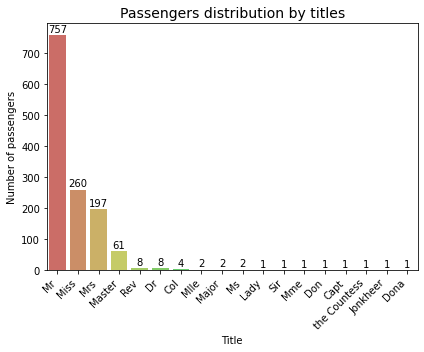

In [ ]:
all_data['Title'] = all_data['Name'].str.split(',', expand = True)[1].str.split('.', expand = True)[0].str.strip(' ')

plt.figure(figsize=(6, 5))
ax = sns.countplot( x = 'Title', data = all_data, palette = "hls", order = all_data['Title'].value_counts().index)
_ = plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light'  
)

plt.title('Passengers distribution by titles',fontsize= 14)
plt.ylabel('Number of passengers')

# calculate passengers for each category
labels = (all_data['Title'].value_counts())
# add result numbers on barchart
for i, v in enumerate(labels):
    ax.text(i, v+10, str(v), horizontalalignment = 'center', size = 10, color = 'black')
    

plt.tight_layout()
plt.show()

The most frequent title among passangers is **Mister** (Mr.) - general title or respect of an adult male. The second title by its frequency is **Miss** (unmarried woman), the third - **Mrs**. (married woman). Other titles are less frequent, I will discover if I can combine them into particular groups. I am going to use titles as a fiture, but if they split the data too much, leaving just a few observations in each group, it can lead to overfitting. And for a general understanding of the data, it will be more convenient to put titles in clearer groups.

**Master** - By the late 19th century, etiquette dictated that men be addressed as **Mister**, and boys as **Master**.

**Mme** - Madame. a French title of respect equivalent to **Mrs**, used alone or prefixed to a woman's married name or title. I will add to **Mrs**.

**Mlle** - Mademoiselle is a French courtesy title, abbreviated **Mlle**, traditionally given to an unmarried woman. The equivalent in English is **Miss**. I will add to **Miss** group.

**Dr**. - Doctor is an academic title.

**Rev**. - Reverend, is usually a courtesy title for Protestant Christian ministers or pastors.

**Military** group of titles:
- **Capt**. -Captain is a title for the commander of a military unit.
- **Major** is a military rank of commissioned officer status.
- **Col**. - The honorary title of Colonel is conferred by several states in the US and certain military units of the Commonwealth of Nations.

**Honor** group of titles:
- **Sir** - is a formal English honorific address for men. **Sir** is used for men titled knights i.e. of orders of chivalry, and later also to baronets, and other offices.
- **the Countess** - is a historical title of nobility.
- **Lady** - a formal title in the United Kingdom. A woman with a title of nobility or honorary.
- **Jonkheer** - is an honorific in the Low Countries denoting the lowest rank within the nobility.

- **Don** - is an honorific prefix primarily used in Spain and the former Spanish Empire, Italy, Portugal, the Philippines, Latin America, Croatia, and Goa. (male)
- **Dona** - Feminine form for don (honorific) a Spanish, Portuguese, southern Italian, and Filipino title, given as a mark of respect.

Not sure about the title Ms, we have only 2 passengers with this title, I will convert it to Miss. I created a dictionary of titles and I am using method "map" to create variable "Title_category".

In [ ]:
all_data[all_data['Title']=='Ms']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
443,444,1.0,2,"Reynaldo, Ms. Encarnacion",female,28.0,0,0,230434,13.00,NaN,S,Ms
88,980,NaN,3,"O'Donoghue, Ms. Bridget",female,NaN,0,0,364856,7.75,NaN,Q,Ms


In [ ]:
title_dict = {  'Mr':     'Mr',
                'Mrs':    'Mrs',
                'Miss':   'Miss',
                'Master': 'Master',
              
                'Ms':     'Miss',
                'Mme':    'Mrs',
                'Mlle':   'Miss',

                'Capt':   'military',
                'Col':    'military',
                'Major':  'military',

                'Dr':     'Dr',
                'Rev':    'Rev',
                  
                'Sir':    'honor',
                'the Countess': 'honor',
                'Lady':   'honor',
                'Jonkheer': 'honor',
                'Don':    'honor',
                'Dona':   'honor' }

# map titles to category
all_data['Title_category'] = all_data['Title'].map(title_dict)

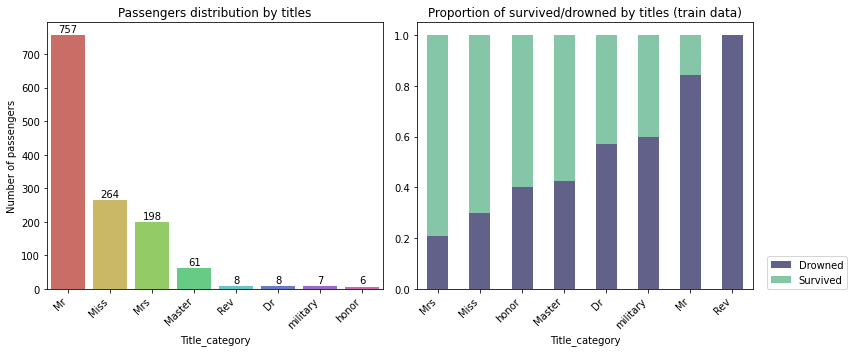

In [ ]:
fig = plt.figure(figsize=(12, 5))


ax1 = fig.add_subplot(121)
ax = sns.countplot(x = 'Title_category', data = all_data, palette = "hls", order = all_data['Title_category'].value_counts().index)
_ = plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light'  
)
plt.title('Passengers distribution by titles',fontsize= 12)
plt.ylabel('Number of passengers')

# calculate passengers for each category
labels = (all_data['Title_category'].value_counts())
# add result numbers on barchart
for i, v in enumerate(labels):
    ax.text(i, v+10, str(v), horizontalalignment = 'center', size = 10, color = 'black')
    

plt.tight_layout()

ax2 = fig.add_subplot(122)
surv_by_title_cat = all_data.groupby('Title_category')['Survived'].value_counts(normalize = True).unstack()
surv_by_title_cat = surv_by_title_cat.sort_values(by=1, ascending = False)
surv_by_title_cat.plot(kind='bar', stacked='True', color=["#3f3e6fd1", "#85c6a9"], ax = ax2)

plt.legend( ( 'Drowned', 'Survived'), loc=(1.04,0))
_ = plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light'  
)


plt.title('Proportion of survived/drowned by titles (train data)',fontsize= 12)

plt.tight_layout()
plt.show()

The smallest group is "honor", passengers with royal-kind titles.

Training data:
- The biggiest proportion of survivals is in "Mrs" group - married woman.
- More than 80% drowned in "Mr." group.
- Nobody survived among Reverend group.

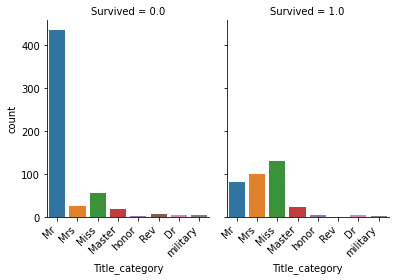

In [ ]:
category_survived = sns.catplot(x="Title_category",  col="Survived",
                data = all_data, kind="count",
                height=4, aspect=.7)

category_survived.set_xticklabels(rotation=45, 
    horizontalalignment='right',
    fontweight='light')

plt.tight_layout()

If we consider the survivors not by percentage within each group but by comparing the number of survivors between groups, then **Miss** title category is the luckiest one. The **Mr** category lost the biggest number of passengers.

Let's also visualize, how Title categories and ticket classes are related:

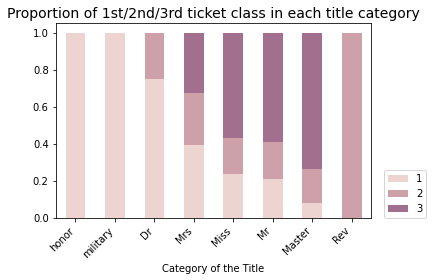

In [ ]:
class_by_title_cat = all_data.groupby('Title_category')['Pclass'].value_counts(normalize = True)
class_by_title_cat = class_by_title_cat.unstack().sort_values(by = 1, ascending = False)
class_by_title_cat.plot(kind='bar', stacked='True', color = ['#eed4d0', '#cda0aa', '#a2708e'])
plt.legend(loc=(1.04,0))
_ = plt.xticks(
    rotation = 45, 
    horizontalalignment = 'right',
    fontweight = 'light'  
)

plt.title('Proportion of 1st/2nd/3rd ticket class in each title category',fontsize= 14)
plt.xlabel('Category of the Title')
plt.tight_layout()

- All honor and military titles occupied the 1st class.
- All Reverends occupied 2nd class.
- The biggest percent of the 3rd class is in the Master category.
F
or sure, there is a relationship between variables, and survival was influenced not only by the title itself but by a combination of factors that are to some extent interrelated. How class could relate on surviving? Let's go further and discover.

## Cabins

https://www.encyclopedia-titanica.org/titanic-deckplans/

From the number of the cabin we can extract first letter, which will tell us about placement of the cabin on the ship! And it seems to me as a very important knowlege:

- How close cabin located to the lifeboats.
- How far from the most damaged parts of the ship.
- How close to people who have information about what is happening and how to act.
- How many obstacles passenger had in the way to the lifeboat.

I found some description of each Titanic deck. There were 8 decks: the upperdeck - for lifeboats, other 7 were under it and had letter symbols:

- **A**: it did not run the entire length of the vessel (i.e. it did not reach from the stern to the bow of the vessel), and was intended for passengers of the 1st class.
- **B**: it did not run the entire length of the ship (it was interrupted by 37 meters above the C deck, and served as a place for anchors in the front).
- **C**: in the front part of the galley, dining room for the crew, as well as a walking area for passengers of the 3rd class.
- **D**: a walking area for passengers .
- **E**: cabins of the 1st and 2nd class.
- **F**: part of the passenger cabins of the 2nd class, most of the cabins of the 3rd class.
- **G**: did not run the entire length of the ship, the boiler rooms were located in the center.
- **T** - boat deck ?
To the passengers without deck information I will imput **U** letter (as unknown).

In [ ]:
all_data['deck'] = all_data['Cabin'].str.split('', expand = True)[1]
all_data.loc[all_data['deck'].isna(), 'deck'] = 'U'
print('Unique deck letters from the cabin numbers:', all_data['deck'].unique())

Unique deck letters from the cabin numbers: ['U' 'C' 'E' 'G' 'D' 'A' 'B' 'F' 'T']


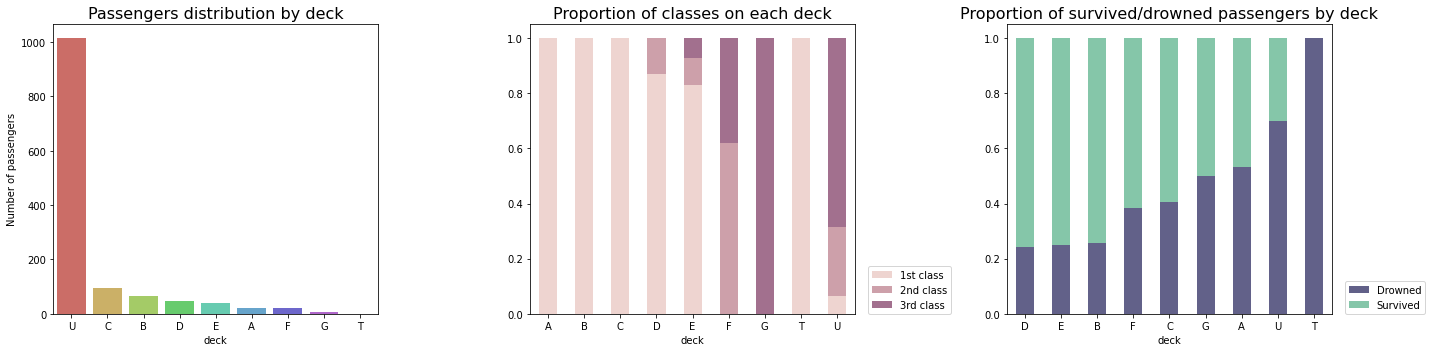

In [ ]:
fig = plt.figure(figsize=(20, 5))

ax1 = fig.add_subplot(131)
sns.countplot(x = 'deck', data = all_data, palette = "hls", order = all_data['deck'].value_counts().index, ax = ax1)
plt.title('Passengers distribution by deck',fontsize= 16)
plt.ylabel('Number of passengers')

ax2 = fig.add_subplot(132)
deck_by_class = all_data.groupby('deck')['Pclass'].value_counts(normalize = True).unstack()
deck_by_class.plot(kind='bar', stacked='True',color = ['#eed4d0', '#cda0aa', '#a2708e'], ax = ax2)
plt.legend(('1st class', '2nd class', '3rd class'), loc=(1.04,0))
plt.title('Proportion of classes on each deck',fontsize= 16)
plt.xticks(rotation = False)

ax3 = fig.add_subplot(133)
deck_by_survived = all_data.groupby('deck')['Survived'].value_counts(normalize = True).unstack()
deck_by_survived = deck_by_survived.sort_values(by = 1, ascending = False)
deck_by_survived.plot(kind='bar', stacked='True', color=["#3f3e6fd1", "#85c6a9"], ax = ax3)
plt.title('Proportion of survived/drowned passengers by deck',fontsize= 16)
plt.legend(( 'Drowned', 'Survived'), loc=(1.04,0))
plt.xticks(rotation = False)
plt.tight_layout()

plt.show()

Most passengers don't have cabin numbers ('U'). The largest part of passengers with known cabin numbers were located on the 'C' deck and had 1st class ticket. 'C' deck is fifth by a percentage of the survivor. The largest surviving rate (among passengers with known cabin numbers in training dataset) had passengers from deck 'D'. Deck A was the closest to the deck with lifeboats, but it is the last in surviving rate (except unknown and T deck). How did it happen?

In [ ]:
all_data[(all_data['deck']=='A') & (all_data['Survived']==0)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Title_category,deck
96,97,0.0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C,Mr,Mr,A
174,175,0.0,1,"Smith, Mr. James Clinch",male,56.0,0,0,17764,30.6958,A7,C,Mr,Mr,A
185,186,0.0,1,"Rood, Mr. Hugh Roscoe",male,NaN,0,0,113767,50.0000,A32,S,Mr,Mr,A
284,285,0.0,1,"Smith, Mr. Richard William",male,NaN,0,0,113056,26.0000,A19,S,Mr,Mr,A
475,476,0.0,1,"Clifford, Mr. George Quincy",male,NaN,0,0,110465,52.0000,A14,S,Mr,Mr,A
583,584,0.0,1,"Ross, Mr. John Hugo",male,36.0,0,0,13049,40.1250,A10,C,Mr,Mr,A
806,807,0.0,1,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0000,A36,S,Mr,Mr,A
867,868,0.0,1,"Roebling, Mr. Washington Augustus II",male,31.0,0,0,PC 17590,50.4958,A24,S,Mr,Mr,A


I was curious, so I read a bit about some of these passengers:
- John Hugo Ross (https://www.encyclopedia-titanica.org/titanic-victim/john-hugo-ross.html). When he boarded on 10 April 1912, he was so ill from dysentery he had to be carried to his cabin on a stretcher. When Ross was told the ship had struck an iceberg and that he should get dressed, Ross refused to believe the trouble serious. "Is that all,?" he told Peuchen. "It will take more than an iceberg to get me off this ship." Presumably, Ross drowned in his bed.

- Andrews, Mr. Thomas Jr. (https://en.wikipedia.org/wiki/Thomas_Andrews) was a managing director of H&W (built the Titanic) in charge of designing and was familiar with every detail of the construction of the firm's ships. He helped to evacuate people.

- Roebling, Mr. Washington Augustus II (https://www.encyclopedia-titanica.org/titanic-victim/washington-roebling.html) helped to evacuate people as well.

It is obvious that there is no algorithm that can predict the survival rate by 100 percent based on the factors of the passenger's location on the ship or his age, since the human factor and the unpredicted emergensy were involved in the rescue process.

For training process it will be better to include passenger from T deck to the A deck group.

## Family

Does the size of the family on Board together affect the chances of surviving a disaster? Does having children increase the chance of getting into a boat, or is it easier to survive being single? I calculate the family size, by summarizing the number of siblings with the parch number plus 1 (passenger himself). Family size = sib + parch + 1

### Calculate family size

In [ ]:
all_data['Family_size'] = all_data['SibSp'] + all_data['Parch'] + 1
family_size = all_data['Family_size'].value_counts()
print('Family size and number of passengers:')
print(family_size)

Family size and number of passengers:
1     790
2     235
3     159
4      43
6      25
5      22
7      16
11     11
8       8
Name: Family_size, dtype: int64


Looks strange that there are 16 passengers with family size of 7, for example. Let's check! Also, I will add a surname variable, by extraxting first word of the name.

In [ ]:
all_data['Surname'] = all_data['Name'].str.split(',', expand = True)[0]

Family of 7??? Group people with family size = 7 by Surname. We have 9 Andersons, who have family size of 7

In [ ]:
all_data[all_data['Family_size'] == 7]['Surname'].value_counts()

Andersson    9
Asplund      7
Name: Surname, dtype: int64

In [ ]:
all_data[(all_data['Family_size'] == 7) & (all_data['Surname']=='Andersson')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Title_category,deck,Family_size,Surname
13,14,0.0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.275,NaN,S,Mr,Mr,U,7,Andersson
68,69,1.0,3,"Andersson, Miss. Erna Alexandra",female,17.0,4,2,3101281,7.925,NaN,S,Miss,Miss,U,7,Andersson
119,120,0.0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.275,NaN,S,Miss,Miss,U,7,Andersson
541,542,0.0,3,"Andersson, Miss. Ingeborg Constanzia",female,9.0,4,2,347082,31.275,NaN,S,Miss,Miss,U,7,Andersson
542,543,0.0,3,"Andersson, Miss. Sigrid Elisabeth",female,11.0,4,2,347082,31.275,NaN,S,Miss,Miss,U,7,Andersson
610,611,0.0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.275,NaN,S,Mrs,Mrs,U,7,Andersson
813,814,0.0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.275,NaN,S,Miss,Miss,U,7,Andersson
850,851,0.0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.275,NaN,S,Master,Master,U,7,Andersson
214,1106,NaN,3,"Andersson, Miss. Ida Augusta Margareta",female,38.0,4,2,347091,7.775,NaN,S,Miss,Miss,U,7,Andersson


Let's group Andersons with 7-size family by ticket number.
There are 7 of them used the same ticket and travelled together. 5 children (each of them has 4 siblings) and 2 parents. To passengers used separated tickets.

In [ ]:
all_data[(all_data['Family_size'] == 7) & (all_data['Surname']=='Andersson')].Ticket.value_counts()

347082     7
3101281    1
347091     1
Name: Ticket, dtype: int64

In [ ]:
all_data[(all_data['Ticket'] == '3101281') | (all_data['Ticket'] == '347091')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Title_category,deck,Family_size,Surname
68,69,1.0,3,"Andersson, Miss. Erna Alexandra",female,17.0,4,2,3101281,7.925,NaN,S,Miss,Miss,U,7,Andersson
214,1106,NaN,3,"Andersson, Miss. Ida Augusta Margareta",female,38.0,4,2,347091,7.775,NaN,S,Miss,Miss,U,7,Andersson


Looks like they actually traveled alone, I will correct that data.

In [ ]:
all_data.loc[all_data['PassengerId'] == 69, ['SibSp', 'Parch', 'Family_size']] = [0,0,1]
all_data.loc[all_data['PassengerId'] == 1106, ['SibSp', 'Parch', 'Family_size']] = [0,0,1]
all_data[(all_data['Ticket'] == '3101281') | (all_data['Ticket'] == '347091')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Title_category,deck,Family_size,Surname
68,69,1.0,3,"Andersson, Miss. Erna Alexandra",female,17.0,0,0,3101281,7.925,NaN,S,Miss,Miss,U,1,Andersson
214,1106,NaN,3,"Andersson, Miss. Ida Augusta Margareta",female,38.0,0,0,347091,7.775,NaN,S,Miss,Miss,U,1,Andersson


Family of 5? There are some inconsistencies in other categories, with fewer relatives. Let's check people with 5-size family and group them by Surname:

In [ ]:
all_data[all_data['Family_size'] == 5]['Surname'].value_counts()

Palsson          5
Ford             5
Lefebre          5
Ryerson          5
Hocking          1
Kink-Heilmann    1
Name: Surname, dtype: int64

In [ ]:
all_data[(all_data['Surname'] == 'Kink-Heilmann')&(all_data['Family_size'] == 5)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Title_category,deck,Family_size,Surname
394,1286,NaN,3,"Kink-Heilmann, Mr. Anton",male,29.0,3,1,315153,22.025,NaN,S,Mr,Mr,U,5,Kink-Heilmann


Kink-Heilmann, Mr. Anton had 2 other siblings on the ship unlike his wife, for whom these relatives do not fit the description of relatives in the data set. We will assume that all other "mismatches" in the groups are similar to this. Since I plan to group the size of families into groups, this will eliminate possible inconsistencies.

### Family size and chanses for surviving

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


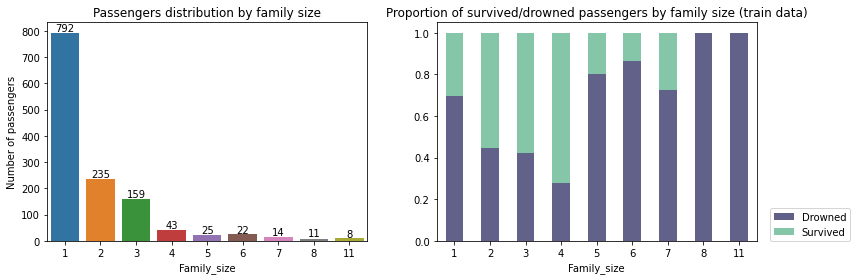

In [ ]:
fig = plt.figure(figsize = (12,4))

ax1 = fig.add_subplot(121)
ax = sns.countplot(all_data['Family_size'], ax = ax1)

# calculate passengers for each category
labels = (all_data['Family_size'].value_counts())
# add result numbers on barchart
for i, v in enumerate(labels):
    ax.text(i, v+6, str(v), horizontalalignment = 'center', size = 10, color = 'black')
    
plt.title('Passengers distribution by family size')
plt.ylabel('Number of passengers')

ax2 = fig.add_subplot(122)
d = all_data.groupby('Family_size')['Survived'].value_counts(normalize = True).unstack()
d.plot(kind='bar', color=["#3f3e6fd1", "#85c6a9"], stacked='True', ax = ax2)
plt.title('Proportion of survived/drowned passengers by family size (train data)')
plt.legend(( 'Drowned', 'Survived'), loc=(1.04,0))
plt.xticks(rotation = False)

plt.tight_layout()

- There were two large families with sizes 8 and 11 and all their members from the training dataset are drowned.
- Most of the passengers were traveling alone, percent of survivals not very large.
- The biggest proportion of survived passengers in group of people who had 4 family members on board.

We can observe that the percentage of survivors in people who have a family of 2, 3, 4 people is greater than in singles, then the percentage of survivors decreases as the family size increases. I will create **Family_size_group** variable with four categories:

- single
- usual (sizes 2, 3, 4)
- big (5, 6, 7)
- and large (all bigger then 7)

In [ ]:
all_data['Family_size_group'] = all_data['Family_size'].map(lambda x: 'f_single' if x == 1 
                                                            else ('f_usual' if 5 > x >= 2 
                                                                  else ('f_big' if 8 > x >= 5 
                                                                       else 'f_large' )
                                                                 ))                     

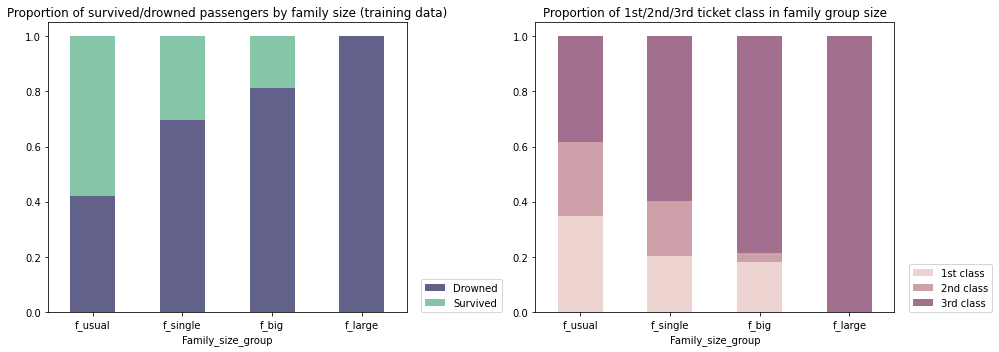

In [ ]:
fig = plt.figure(figsize = (14,5))

ax1 = fig.add_subplot(121)
d = all_data.groupby('Family_size_group')['Survived'].value_counts(normalize = True).unstack()
d = d.sort_values(by = 1, ascending = False)
d.plot(kind='bar', stacked='True', color = ["#3f3e6fd1", "#85c6a9"], ax = ax1)
plt.title('Proportion of survived/drowned passengers by family size (training data)')
plt.legend(( 'Drowned', 'Survived'), loc=(1.04,0))
_ = plt.xticks(rotation=False)


ax2 = fig.add_subplot(122)
d2 = all_data.groupby('Family_size_group')['Pclass'].value_counts(normalize = True).unstack()
d2 = d2.sort_values(by = 1, ascending = False)
d2.plot(kind='bar', stacked='True', color = ['#eed4d0', '#cda0aa', '#a2708e'], ax = ax2)
plt.legend(('1st class', '2nd class', '3rd class'), loc=(1.04,0))
plt.title('Proportion of 1st/2nd/3rd ticket class in family group size')
_ = plt.xticks(rotation=False)

plt.tight_layout()

Large families are all from 3rd class and no one from the training part of the dataset is survived. The biggest proportion of the 1st class in the usual size of the family and the proportion of survivors in the usual family is the biggest.

## Class

We have made a lot of assumptions about the survival rate depending on the classes. Let's now look closely at this variable.

## Passengers by class


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


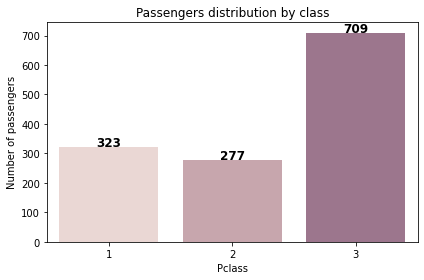

In [ ]:
ax = sns.countplot(all_data['Pclass'], palette = ['#eed4d0', '#cda0aa', '#a2708e'])
# calculate passengers for each category
labels = (all_data['Pclass'].value_counts(sort = False))
# add result numbers on barchart
for i, v in enumerate(labels):
    ax.text(i, v+2, str(v), horizontalalignment = 'center', size = 12, color = 'black', fontweight = 'bold')
    
    
plt.title('Passengers distribution by class')
plt.ylabel('Number of passengers')
plt.tight_layout()

Most of the Titanic's passengers were traveling third class (709). The second class is the smallest in terms of the number of passengers

### Class vs surviving status

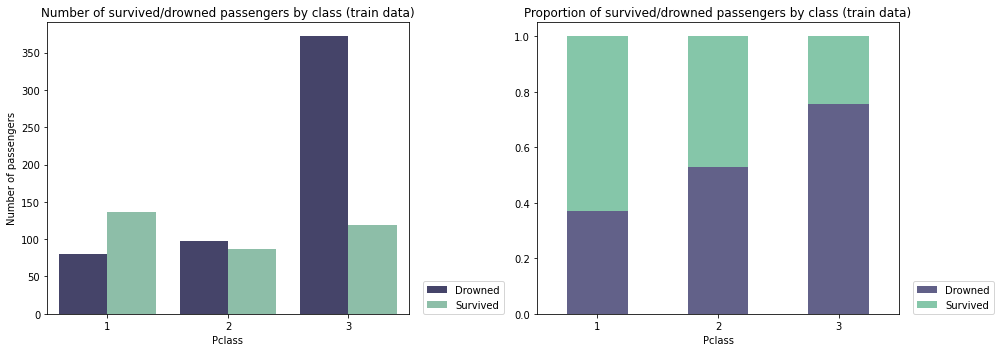

In [ ]:
fig = plt.figure(figsize=(14, 5))

ax1 = fig.add_subplot(121)
sns.countplot(x = 'Pclass', hue = 'Survived', data = all_data, palette=["#3f3e6fd1", "#85c6a9"], ax = ax1)
plt.title('Number of survived/drowned passengers by class (train data)')
plt.ylabel('Number of passengers')
plt.legend(( 'Drowned', 'Survived'), loc=(1.04,0))
_ = plt.xticks(rotation=False)

ax2 = fig.add_subplot(122)
d = all_data.groupby('Pclass')['Survived'].value_counts(normalize = True).unstack()
d.plot(kind='bar', stacked='True', ax = ax2, color =["#3f3e6fd1", "#85c6a9"])
plt.title('Proportion of survived/drowned passengers by class (train data)')
plt.legend(( 'Drowned', 'Survived'), loc=(1.04,0))
_ = plt.xticks(rotation=False)

plt.tight_layout()

Despite the previously identified prerequisites (on average, older people are more likely to die, and in the first class, the average age is higher than in other classes. Also, passengers on deck A, which consists of 100% first class, have a large proportion of drowned passengers), the first class has the largest number of survivors and the proportion of survivors within the class is the largest. Third-class tickets had the highest number of drowned passengers, and most of the third-class passengers drowned.

### Class vs surviving status vs gender

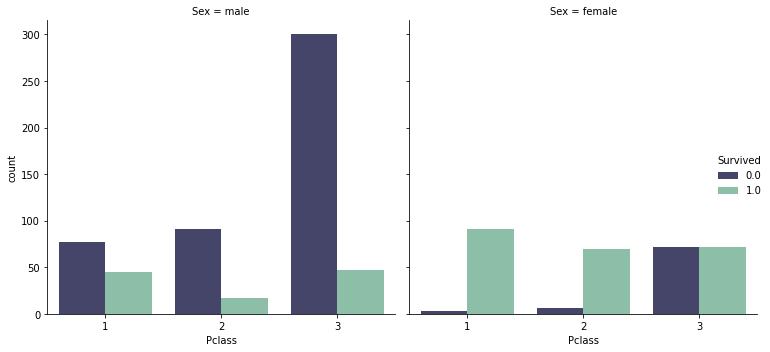

In [ ]:
sns.catplot(x = 'Pclass', hue = 'Survived', col = 'Sex', kind = 'count', data = all_data , palette=["#3f3e6fd1", "#85c6a9"])

plt.tight_layout()

However, most of the male passengers of the first class drowned, and the female almost all survived. In the third grade, half of the female survived.

### Class vs. Gender vs. Age -> Surviving status

For better understanding how the combination of some factors influence on chances to survive, lets break passengers into 18 imaginary groups separated by:

- Class (1 / 2 / 3)
- Gender (male / female)
- Age ( <16 / 16-40 / 40<)

To do so I will create 6 stripplots (3 for male, 3 for female), with values grouped by Surviving status and add background color to separate age groups:

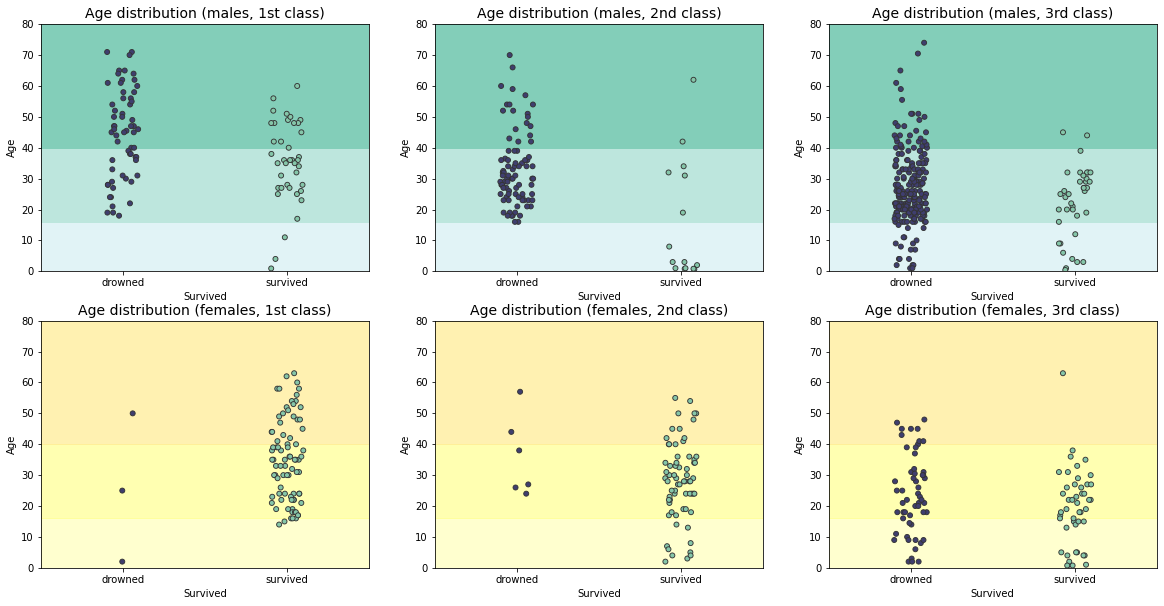

In [ ]:
plt.figure(figsize=(20, 10))
palette=["#3f3e6fd1", "#85c6a9"]

plt.subplot(2, 3, 1)
sns.stripplot(x = 'Survived', y = 'Age', data = age_1_class[age_1_class['Sex']=='male'],
     linewidth = 0.9, palette = palette)
plt.axhspan(0, 16, color = "#e1f3f6")
plt.axhspan(16, 40, color = "#bde6dd")
plt.axhspan(40, 80, color = "#83ceb9")
plt.title('Age distribution (males, 1st class)',fontsize= 14)
plt.xticks( np.arange(2), ['drowned', 'survived'])
plt.ylim(0, 80)

plt.subplot(2, 3, 2)
sns.stripplot(x = 'Survived', y = 'Age', data = age_2_class[age_2_class['Sex']=='male'],
     linewidth = 0.9, palette = palette)
plt.axhspan(0, 16, color = "#e1f3f6")
plt.axhspan(16, 40, color = "#bde6dd")
plt.axhspan(40, 80, color = "#83ceb9")
plt.title('Age distribution (males, 2nd class)',fontsize= 14)
plt.xticks( np.arange(2), ['drowned', 'survived'])
plt.ylim(0, 80)

plt.subplot(2, 3, 3)
sns.stripplot(x = 'Survived', y = 'Age', data = age_3_class[age_3_class['Sex']=='male'],
              linewidth = 0.9, palette = palette)
plt.axhspan(0, 16, color = "#e1f3f6")
plt.axhspan(16, 40, color = "#bde6dd")
plt.axhspan(40, 80, color = "#83ceb9")
plt.title('Age distribution (males, 3rd class)',fontsize= 14)
plt.xticks( np.arange(2), ['drowned', 'survived'])
plt.ylim(0, 80)


plt.subplot(2, 3, 4)
sns.stripplot(x = 'Survived', y = 'Age', data = age_1_class[age_1_class['Sex']=='female'],
     linewidth = 0.9, palette = palette)
plt.axhspan(0, 16, color = "#ffff9978")
plt.axhspan(16, 40, color = "#ffff97bf")
plt.axhspan(40, 80, color = "#ffed97bf")
plt.title('Age distribution (females, 1st class)',fontsize= 14)
plt.xticks( np.arange(2), ['drowned', 'survived'])
plt.ylim(0, 80)

plt.subplot(2, 3, 5)
sns.stripplot(x = 'Survived', y = 'Age', data = age_2_class[age_2_class['Sex']=='female'],
     linewidth = 0.9, palette = palette)
plt.axhspan(0, 16, color = "#ffff9978")
plt.axhspan(16, 40, color = "#ffff97bf")
plt.axhspan(40, 80, color = "#ffed97bf")
plt.title('Age distribution (females, 2nd class)',fontsize= 14)
plt.xticks( np.arange(2), ['drowned', 'survived'])
plt.ylim(0, 80)

plt.subplot(2, 3, 6)
sns.stripplot(x = 'Survived', y = 'Age', data = age_3_class[age_3_class['Sex']=='female'],
              linewidth = 0.9, palette = palette)
plt.axhspan(0, 16, color = "#ffff9978")
plt.axhspan(16, 40, color = "#ffff97bf")
plt.axhspan(40, 80, color = "#ffed97bf")
plt.title('Age distribution (females, 3rd class)',fontsize= 14)
plt.xticks( np.arange(2), ['drowned', 'survived'])
plt.ylim(0, 80)


plt.show()

From these graphs (training data only) we can see, that:

- only one kid (<16) from 1st and 2nd classes are drowned (female from the 1st class).
- but children from the 3rd class were not so lucky, looks like chances to survive for passengers <16 were 50/50 for male and female.
- most females from 1st and 2nd class are survived, without much difference in Age.
- females from 3rd class in Age group 40+ drowned except one.
- similar picture for males in 2nd and 3rd classes in the Age group 40+: only 2 from each class are survived.
- for 40+ males from 1st class situation were slightly different, there are more survived passengers.
- the largest "accumulation" of drowned passengers is observed in the Age group 16-40 males, 3rd class.

## Gender

Let's discover gender a little bit more:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


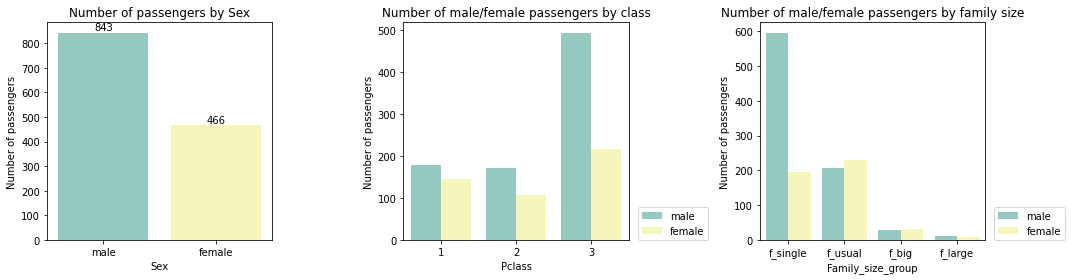

In [ ]:
plt.figure(figsize = (15,4))

plt.subplot (1,3,1)
ax = sns.countplot(all_data['Sex'], palette="Set3")
plt.title('Number of passengers by Sex')
plt.ylabel('Number of passengers')

# calculate passengers for each category
labels = (all_data['Sex'].value_counts())
# add result numbers on barchart
for i, v in enumerate(labels):
    ax.text(i, v+10, str(v), horizontalalignment = 'center', size = 10, color = 'black')
    

plt.subplot (1,3,2)
sns.countplot( x = 'Pclass', data = all_data, hue = 'Sex', palette="Set3")
plt.title('Number of male/female passengers by class')
plt.ylabel('Number of passengers')
plt.legend( loc=(1.04,0))

plt.subplot (1,3,3)
sns.countplot( x = 'Family_size_group', data = all_data, hue = 'Sex', 
              order = all_data['Family_size_group'].value_counts().index , palette="Set3")
plt.title('Number of male/female passengers by family size')
plt.ylabel('Number of passengers')
plt.legend( loc=(1.04,0))
plt.tight_layout()

There were overall more males than females on board, it is fair for each ticket class, but in the 3rd class number of males more than twice bigger than females.
Almost 600 male passengers traveled without family members and only about 200 females, but in usual and big families there were slightly more female passengers.

## Embarked

Titanic had 3 embarkation points before the ship started its route to New York:

- Southampton
- Cherbourg
- Queenstown

Some passengers could leave Titanic in Cherbourg or Queenstown and avoid catastrophe. Also, the point of embarkation could have an influence on ticket fare and location on the ship.

Port of Embarkation (**C** = Cherbourg; **Q** = Queenstown; **S** = Southampton)

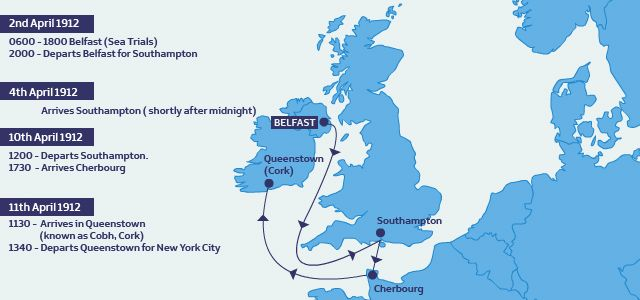

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


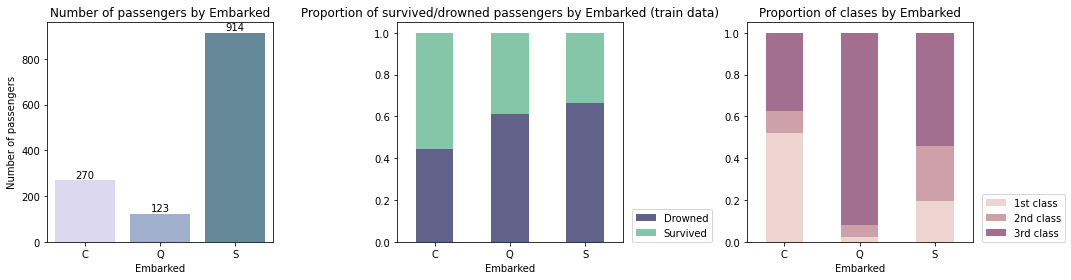

In [ ]:
fig = plt.figure(figsize = (15,4))

ax1 = fig.add_subplot(131)
palette = sns.cubehelix_palette(5, start = 2)
ax = sns.countplot(all_data['Embarked'], palette = palette, order = ['C', 'Q', 'S'], ax = ax1)
plt.title('Number of passengers by Embarked')
plt.ylabel('Number of passengers')

# calculate passengers for each category
labels = (all_data['Embarked'].value_counts())
labels = labels.sort_index()
# add result numbers on barchart
for i, v in enumerate(labels):
    ax.text(i, v+10, str(v), horizontalalignment = 'center', size = 10, color = 'black')
    

ax2 = fig.add_subplot(132)
surv_by_emb = all_data.groupby('Embarked')['Survived'].value_counts(normalize = True)
surv_by_emb = surv_by_emb.unstack().sort_index()
surv_by_emb.plot(kind='bar', stacked='True', color=["#3f3e6fd1", "#85c6a9"], ax = ax2)
plt.title('Proportion of survived/drowned passengers by Embarked (train data)')
plt.legend(( 'Drowned', 'Survived'), loc=(1.04,0))
_ = plt.xticks(rotation=False)


ax3 = fig.add_subplot(133)
class_by_emb = all_data.groupby('Embarked')['Pclass'].value_counts(normalize = True)
class_by_emb = class_by_emb.unstack().sort_index()
class_by_emb.plot(kind='bar', stacked='True', color = ['#eed4d0', '#cda0aa', '#a2708e'], ax = ax3)
plt.legend(('1st class', '2nd class', '3rd class'), loc=(1.04,0))
plt.title('Proportion of clases by Embarked')
_ = plt.xticks(rotation=False)

plt.tight_layout()

- Most number of passengers (914) were embarked in Southampton. Also Southampton has the biggiest proportion of drowned passengers.
- 270 passengers emarked in Cherbourg and more than 50% of them survived (in the training dataset).
- 123 of passengers embarked in Queenstown, the vast majority of them are 3rd class passengers

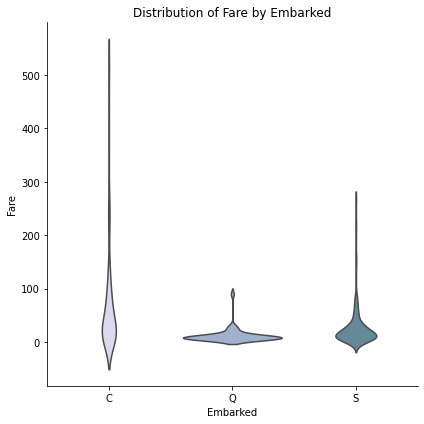

In [ ]:
sns.catplot(x="Embarked", y="Fare", kind="violin", inner=None,
            data=all_data, height = 6, palette = palette, order = ['C', 'Q', 'S'])
plt.title('Distribution of Fare by Embarked')
plt.tight_layout()

In [ ]:
# Descriptive statistics:
pd.DataFrame(all_data.groupby('Embarked')['Fare'].describe())

,count,mean,std,min,25%,50%,75%,max
Embarked,,,,,,,,
C,270.0,62.336267,84.185996,4.0125,13.8583,28.51875,78.966675,512.3292
Q,123.0,12.409012,13.616133,6.7500,7.7500,7.75000,10.197900,90.0000
S,913.0,27.418824,37.096402,0.0000,8.0500,13.00000,27.750000,263.0000


- The wider fare distribution among passengers who embarked in Cherbourg. It makes scence - many first-class passengers boarded the ship here, but the share of third-class passengers is quite significant.
- The smallest variation in the price of passengers who boarded in q. Also, the average price of these passengers is the smallest, I think this is due to the fact that the path was supposed to be the shortest + almost all third-class passengers.

Let's check NA values of Embarked variable:

In [ ]:
train_data[train_data['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


These two passengers traveled together (same ticket number). To impute missing values, we can use mode value for passengers with the closest fare value and Pclass.

## Fare

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 30.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 64.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 83.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


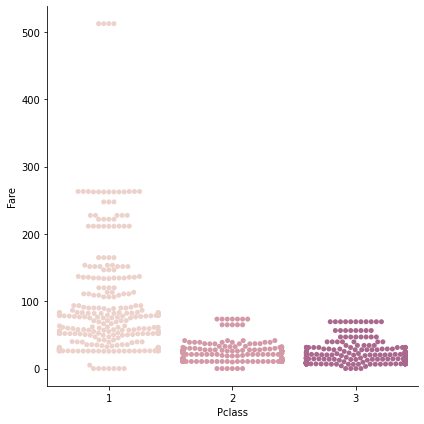

In [ ]:
sns.catplot(x="Pclass", y="Fare", kind="swarm", data=all_data, palette=sns.cubehelix_palette(5, start = 3), height = 6)

plt.tight_layout()

We can observe that the distribution of prices for the second and third class is very similar. The distribution of first-class prices is very different, has a larger spread, and on average prices are higher.

Let's add colours to our points to indicate surviving status of passenger (there will be only data from training part of the dataset):

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 22.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 56.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 77.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


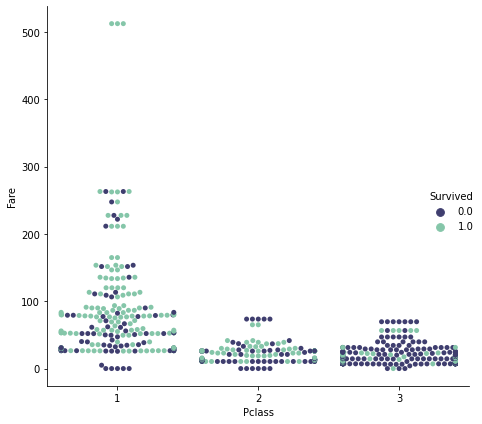

In [ ]:
sns.catplot(x="Pclass", y="Fare",  hue = "Survived", kind="swarm", data=all_data, 
                                    palette=["#3f3e6fd1", "#85c6a9"], height = 6)
plt.tight_layout()

Looks like the bigger passenger paid, the more chances to survive he had. What about zero fare in the first class? Is it a mistake?

In [ ]:
all_data[all_data['Fare'] == min(all_data['Fare'])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Title_category,deck,Family_size,Surname,Family_size_group
179,180,0.0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S,Mr,Mr,U,1,Leonard,f_single
263,264,0.0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S,Mr,Mr,B,1,Harrison,f_single
271,272,1.0,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S,Mr,Mr,U,1,Tornquist,f_single
277,278,0.0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S,Mr,Mr,U,1,Parkes,f_single
302,303,0.0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S,Mr,Mr,U,1,Johnson,f_single
413,414,0.0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S,Mr,Mr,U,1,Cunningham,f_single
466,467,0.0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S,Mr,Mr,U,1,Campbell,f_single
481,482,0.0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S,Mr,Mr,U,1,Frost,f_single
597,598,0.0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S,Mr,Mr,U,1,Johnson,f_single
633,634,0.0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S,Mr,Mr,U,1,Parr,f_single


Some of the passengers have "Line" tickets, perhaps they were somehow involved in the Titanic, but were not the ship's crew. I don't think we should change these prices, but add an additional feature for these passengers.

# Conclusion

We know that there were not enough boats on Board the Titanic for all passengers to be able to evacuate. After studying the information about the passengers, we can make some assumptions about who had a better chance of survival in a shipwreck situation as well as General observations about passengers.

- There are 891 passengers in the train dataset, 549 (61,6%) of them drowned and only 342 (38,4%) survived. But we know, that lifeboats (16 wooden lifeboats and four collapsible) could carry 53% of total passengers.
- The Age of all passengers vary from about 0.17 year to 80 years with average 29.88. The mean age of survived passenger is 28.23 which on 2.39 smaller than the mean age of drowned passengers (only passengers we know survived status for). It looks like there is a slightly bigger chance to survive for younger people.
- Exploring the title of passengers, we can see that the biggest proportion of survivors is in the "Mrs" group - a married woman. More than 80% drowned in the "Mr." group and nobody survived among the Reverend group.
- Most passengers don't have cabin numbers. The largest part of passengers with known cabin numbers was located on the 'C' deck and had 1st class ticket. 'C' deck is fifth by a percentage of the survivor. The largest surviving rate (among passengers with known cabin numbers in training dataset) had passengers from deck 'D'. Deck A was the closest to the deck with lifeboats, but it is the last in the surviving rate.
- The family size on board also seems to have an influence on chances for survival: there were two large families with sizes 8 and 11 and all their members from the training dataset are drowned. We can observe that the percentage of survivors in people who have a family of 2, 3, 4 people is greater than in singles, then the percentage of survivors decreases as the family size increases.
- Most of the Titanic's passengers were traveling third class (709). The second class is the smallest in terms of the number of passengers. Despite the previously identified prerequisites (on average, older people are more likely to die, and in the first class, the average age is higher than in other classes. Also, passengers on deck A, which consists of 100% first class, have a large proportion of drowned passengers), the first-class has the largest number of survivors and the proportion of survivors within the class is the largest.
Third-class tickets had the highest number of drowned passengers, and most of the third-class passengers drowned.
- However, most of the male passengers of the first class drowned, and the female almost all survived. In the third grade, half of the females survived. There were overall more males than females on board, it is fair for each ticket class, but in the 3rd class number of males more than twice bigger than females.
Almost 600 male passengers traveled without family members and only about 200 females, but in usual and big families there were slightly more female passengers.
- Most numbers of passengers (914) were embarked in Southampton. Also, Southampton has the biggest proportion of drowned passengers. 270 passengers embarked in Cherbourg and more than 50% of them survived (in the training dataset). 123 of passengers embarked in Queenstown, the vast majority of them are 3rd class passengers.

If we use a naive approach and consider all the parameters separately, then young female first-class passengers with the title Mrs have a moderate number of relatives on Board, who paid a large amount for a ticket and went on Board in Cherbourg have a better chance of survival. For sure, there is a relationship between variables, and survival was influenced not only by the title, or ticket, or age itself but by a combination of factors that are to some extent interrelated.
And It is obvious that there is no algorithm that can predict the survival rate by 100 percent based on the factors of the passenger's location on the ship or his age, since the human factor and the unpredicted emergency were involved in the rescue process.

# Handling missing values/ outliers/ mistakes


## Missing values

Missing values can be caused by different reasons, there are three main mechanisms:

- Missing Completely at Random (MCAR) - there is no relationship between the missingness of the data and any values, observed or missing.
- Missing at Random (MAR) - there is a systematic relationship between the propensity of missing values and the observed data, but not the missing data.
- Missing Not at Random(MNAR) - there is a relationship between the propensity of a value to be missing and its values.

Depending on reasons, why values are missing, we should act differently with data imputation. It's not easy to say for sure, what type of missing values we have, but we can do some assumptions.

For example, based on the fact that among the passengers without the specified cabin, the percentage of drowned is higher, you might think that the presence of this information tells us something (MAR). Cabin information is missing from a very large number of passengers (687 NA in training dataset and 327 in test dataset). I read about the assumptions that this information was collected from the words of survived passengers. If this is the case, then the presence or absence of data is itself important information.
To preserve a possible insight, we can add a separate flag that the passenger cabin is unknown. I use the cabin to determine the passenger's deck, for those who do not have the information, I will add the 'U' flag. I don't plan to use the cabin itself.

Age can be a similar situation (there are bigger percent of passengers who survived among passengers with not NA Age), so I will add a flag that age is not specified ('Age_NA') before inserting the assumed values into the age variable.

There are table of missing values:

In [ ]:
# check data for NA values
train_NA = train_data.isna().sum()
test_NA = test_data.isna().sum()
pd.concat([train_NA, test_NA], axis=1, sort = False, keys = ['Train NA', 'Test NA'])

,Train NA,Test NA
PassengerId,0,0.0
Survived,0,NaN
Pclass,0,0.0
Name,0,0.0
Sex,0,0.0
Age,177,86.0
SibSp,0,0.0
Parch,0,0.0
Ticket,0,0.0
Fare,0,1.0


Using sns.heatmap we can visualise missing values:

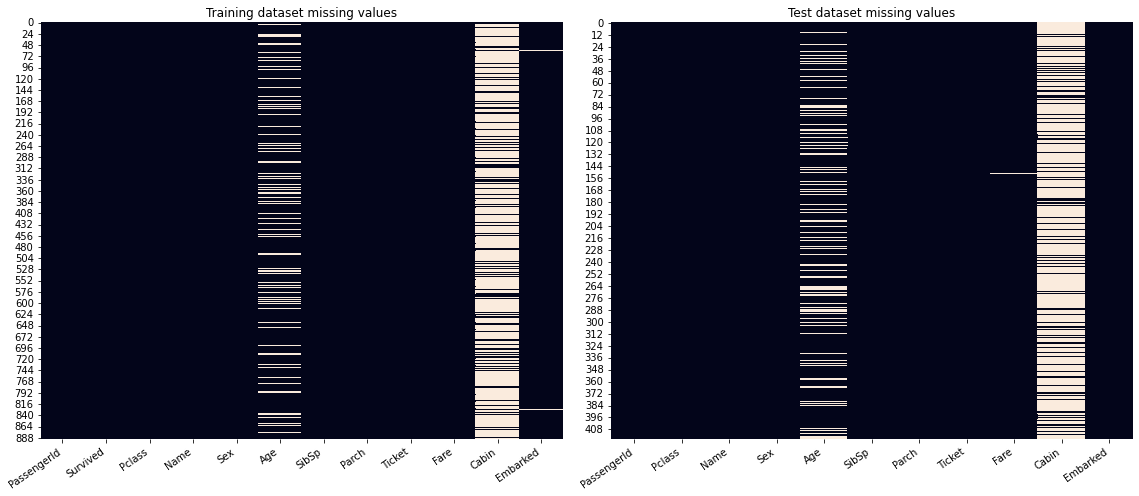

In [ ]:
plt.figure(figsize = (16, 7))

plt.subplot(1,2,1)
sns.heatmap(train_data.isnull(), cbar=False)
plt.xticks(rotation = 35,     horizontalalignment='right',
    fontweight='light'  )
plt.title('Training dataset missing values')

plt.subplot(1,2,2)
sns.heatmap(test_data.isnull(), cbar=False)
plt.xticks(rotation=35,     horizontalalignment='right',
    fontweight='light'  )
plt.title('Test dataset missing values')

plt.tight_layout()

### Age

First, add Age_NA variable indicates that there is no age in the original data.
Second, I will imput median Age calculated inside of each Pclass + Sex + Title_category group. To do so, I extracting Title from Name variable and map it on title category dictionary.

In [ ]:
# Add new variable Age_NA indicates that there is no age in the original data.
train_data.loc[train_data['Age'].isna(), 'Age_NA'] = 1     # 1 for missing Age value
train_data.loc[train_data['Age_NA'].isna(), 'Age_NA'] = 0  # 0 if Age value is not null
test_data.loc[test_data['Age'].isna(), 'Age_NA'] = 1       
test_data.loc[test_data['Age_NA'].isna(), 'Age_NA'] = 0

# titles categories dict
title_dict = {  'Mr':     'Mr',
                'Mrs':    'Mrs',
                'Miss':   'Miss',
                'Master': 'Master',              
                'Ms':     'Miss',
                'Mme':    'Mrs',
                'Mlle':   'Miss',
                'Capt':   'military',
                'Col':    'military',
                'Major':  'military',
                'Dr':     'Dr',
                'Rev':    'Rev',                  
                'Sir':    'honor',
                'the Countess': 'honor',
                'Lady':   'honor',
                'Jonkheer': 'honor',
                'Don':    'honor',
                'Dona':   'honor' }

# add title variable
train_data['Title'] = train_data['Name'].str.split(',', expand = True)[1].str.split('.', expand = True)[0].str.strip(' ')
test_data['Title'] = test_data['Name'].str.split(',', expand = True)[1].str.split('.', expand = True)[0].str.strip(' ')

# map titles to category
train_data['Title_category'] = train_data['Title'].map(title_dict)
test_data['Title_category'] = test_data['Title'].map(title_dict)

# delete Title variable
del train_data['Title']
del test_data['Title']

# Filling the missing values in Age with the medians of Sex and Pclass, Title groups
train_data['Age'] = train_data.groupby(['Pclass', 'Sex', 'Title_category'])['Age'].apply(lambda x: x.fillna(x.median()))
test_data['Age'] = test_data.groupby(['Pclass', 'Sex', 'Title_category'])['Age'].apply(lambda x: x.fillna(x.median()))

### Embarked

There are two missing Embarked values. Both of the passengers are with ticket number = 113572 (and same cabin number), so they traveled together. I will imput values with mode value for same class passengers in similar fare group (77-82), because Fare should depend on class and duration of the trip (which depends on the place of boarding).

In [ ]:
train_data[train_data['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_NA,Title_category
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,0.0,Miss
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,0.0,Mrs


In [ ]:
mode_emb = train_data[(train_data['Fare'] > 77) & (train_data['Fare'] < 82)& (train_data['Pclass']==1)]['Embarked'].mode()
train_data.loc[train_data['Embarked'].isna(), 'Embarked'] = mode_emb[0]

### Fare

Only one fare value is missed. I will fill NA with median Fare calculated inside of same Pclass + Sex + Title_category + Parch group.

In [ ]:
# Filling the missing values in Age with the medians of Sex and Pclass, Title groups
test_data['Fare'] = test_data.groupby(['Pclass', 'Sex', 'Title_category', 'Parch'])['Fare'].apply(lambda x: x.fillna(x.median()))

# Feature engineering

From 11 variables I will generate 31 features for each passenger.
We need to transform categorical variables into numbers, because most models only accept numbers as input. I will use following ways to do it:

1- Dummy variables -a numerical variable used to represent subgroups of the sample in your study. Takes only the value 0 or 1 to indicate the absence or presence of some feature. This method are very suitable for nominal categorical variables, which has no intrinsic ordering to its categories.

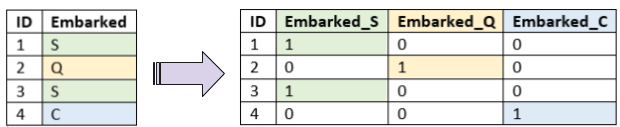

2- Replace string values by numbers - suitable for ordinal variables (such as passenger ticket class) or if we have only two possible values (In this dataset we can implement it to Sex, for example).

Features:

- **Deck** (8 features) - From the number of the cabin we can extract first letter, which will tell us about placement of the cabin on the ship (Deck). If there is no Cain number, the value will be **U** - unknown. Using get_dummies function, I convert it to 8 dummy features with prefix **deck**.
- **Title_category** (8 features) - We already created **Title_category** variable in missing imputation part. Using get_dummies function, I convert it to 8 dummy features with prefix **title**.
- **Family_size_group** (4 features) - I calculate **Family_size** by summarizing **SibSp** and **Parch** variables and adding 1. Then I create **Family_size_group** (4 possible values) based on family size. Using get_dummies function, I convert it to 8 dummy features with prefix **family**.
- **Age_NA** (1 feature) - We created this variable during missing imputation process.
- **Zero_fare** (1 feature) - Mark people with zero fare, since they can be related to the White Star Line.
- **Embarked** (3 features) - Using get_dummies function, I convert **Embarked** variable to 3 dummy features with prefix **embarked**.
- Sex (1 feature) - since we have only 2 possible values, I conver it to binary feature - **1** if female, **0** if male.
- Age (1 feature) - already numeric (continuous).
- Fare (1 feature) - already numeric (continuous).
- Pclass (1 feature) - already numeric (ordinal categorical variable).
- SibSp (1 feature) - since we already use size of family, I convert **SibSp** to binary feature - **1** if there are siblings / spouses aboard the Titanic, **0** if not.
- **Parch** (1 feature) - since we already use size of family, I convert **Parch** to binary feature - **1** if there are parents / children aboard the Titanic, **0** if not.

## Function

In [ ]:
def feature_generator (data, train = False):
    
    features_data = data
    
    # Deck
    # Extract deck letter from cabin number
    features_data['deck'] = features_data['Cabin'].str.split('', expand = True)[1]
    # If cabin is NA - deck = U
    features_data.loc[features_data['deck'].isna(), 'deck'] = 'U'
    # If cabin is T - change to A (see EDA)
    features_data.loc[features_data['deck'] == 'T', 'deck'] = 'A'
    # Create dummy variables with prefix 'deck'
    features_data = pd.concat([features_data,
                               pd.get_dummies(features_data['deck'], prefix = 'deck')], 
                               axis=1)
    
    
    # titles dummy
    features_data = pd.concat([features_data, 
                               pd.get_dummies(features_data['Title_category'],
                                              prefix = 'title')], axis=1)

    # family size
    features_data['Family_size'] = features_data['SibSp'] + features_data['Parch'] + 1
    features_data['Family_size_group'] = features_data['Family_size'].map(
                                            lambda x: 'f_single' if x == 1 
                                                    else ('f_usual' if 5 > x >= 2 
                                                          else ('f_big' if 8 > x >= 5 
                                                               else 'f_large' )))
    features_data = pd.concat([features_data, 
                               pd.get_dummies(features_data['Family_size_group'], 
                                              prefix = 'family')], axis=1)     
    
    
    # Sex to number
    features_data['Sex'] = features_data['Sex'].map({'female': 1, 'male': 0}).astype(int)
    
    # embarked dummy
    features_data = pd.concat([features_data, 
                               pd.get_dummies(features_data['Embarked'], 
                                              prefix = 'embarked')], axis=1)
    
    # zero fare feature
    features_data['zero_fare'] = features_data['Fare'].map(lambda x: 1 if x == 0 else (0))
    
    # from numeric to categorical
    features_data['SibSp'] = features_data['SibSp'].map(lambda x: 1 if x > 0 else (0))
    features_data['Parch'] = features_data['Parch'].map(lambda x: 1 if x > 0 else (0))
    
    # delete variables we are not going to use anymore
    del features_data['PassengerId']
    del features_data['Ticket']
    del features_data['Cabin']
    del features_data['deck']    
    del features_data['Title_category']
    del features_data['Name']
    del features_data['Family_size']
    del features_data['Family_size_group'] 
    del features_data['Embarked']    
    
    return features_data

### Generation

Generte features for training and test datasets:

In [ ]:
# Generate features from training dataset
all_train_features = feature_generator(train_data)
# Generate features from test dataset
all_test_features = feature_generator(test_data)

In [ ]:
all_train_features

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Age_NA,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_U,title_Dr,title_Master,title_Miss,title_Mr,title_Mrs,title_Rev,title_honor,title_military,family_f_big,family_f_large,family_f_single,family_f_usual,embarked_C,embarked_Q,embarked_S,zero_fare
0,0,3,0,22.0,1,0,7.2500,0.0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,1,1,1,38.0,1,0,71.2833,0.0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0
2,1,3,1,26.0,0,0,7.9250,0.0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,1,1,1,35.0,1,0,53.1000,0.0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
4,0,3,0,35.0,0,0,8.0500,0.0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
887,1,1,1,19.0,0,0,30.0000,0.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
888,0,3,1,18.0,1,1,23.4500,1.0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
889,1,1,0,26.0,0,0,30.0000,0.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0


## Correlation

Correlation refers to how close two variables are to having a linear relationship with each other. Features with high correlation are more linearly dependent and hence have almost the same effect on the dependent variable. So, when two features have high correlation, we can drop one of the two features.

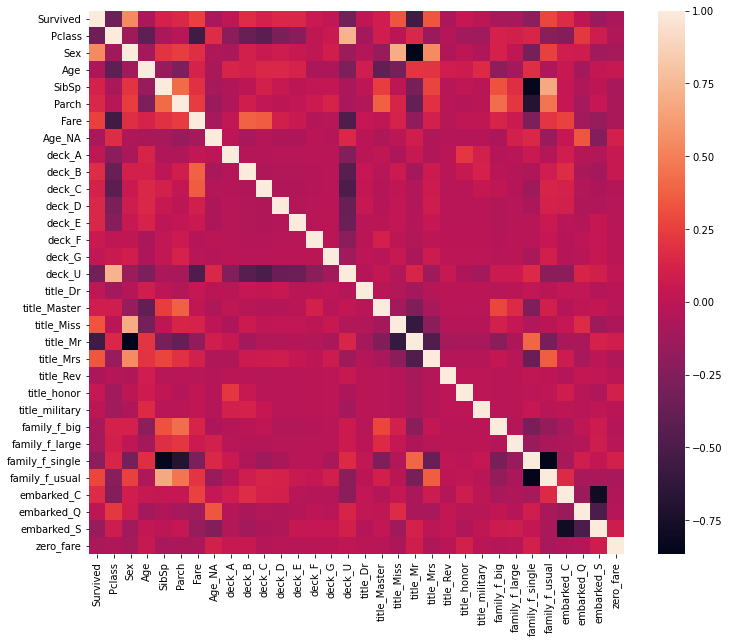

In [ ]:
plt.figure(figsize=(12,10))
cor = all_train_features.corr()
sns.heatmap(cor)

Аrom the graph, we can see that some features have correlation (for example, here is a title **Mr** and the **Sex** of the passenger, the size of the family - single and the presence of siblings, fare and class). However, I decided to leave all the attributes to see how the models will sort them by importance.